<a href="https://colab.research.google.com/github/parksj003/LG-CNN-Lecture/blob/master/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial setting & data loading 

In [ ]:
# import gdown
# gdown.download(url='http://conlms.lge.com/dwn/ext/200/G006/2020/09/03/904cec52-3a5d-4dbf-a243-b9773cd9e89a.zip', output='dataset.zip', quiet=True)
# !unzip dataset.zip -d .

# gdown.download(url='http://conlms.lge.com/dwn/ext/200/G006/2020/09/03/1f7756a1-c469-456f-8236-c1e1f6d3a423.zip', output='dataset.zip', quiet=True)
# !unzip dataset.zip -d .

# gdown.download(url='http://conlms.lge.com/dwn/ext/200/G006/2020/09/03/70dd9cde-6b9e-400a-ac02-a066d758d7a7.zip', output='dataset.zip', quiet=True)
# !unzip dataset.zip -d .

import matplotlib.pyplot as plt
plt.style.use(['classic'])
 #'seaborn-dark', 'dark_background', fivethirtyeight', 'ggplot', 'bmh', 'classi

Archive:  dataset.zip
replace ./haarcascade_frontalface_alt.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ./haarcascade_frontalface_alt.xml  


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
# os.mkdir('openCVModel')
# %cd openCVModel

# 1.openCVEx1(이미지 읽고 쓰기)




In [ ]:
import cv2
import urllib.request as req
url = 'http://uta.pw/shodou/img/28/214.png'
req.urlretrieve(url, 'downimage.png')

('downimage.png', <http.client.HTTPMessage at 0x7f6f9a468c18>)

In [ ]:
# img = cv2.imread('/content/downimage.png')
img = cv2.imread('/content/openCVModel/test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite('out.png', img)

In [ ]:
img = cv2.imread('test.jpg')
im2 = cv2.resize(img, (600, 300))
cv2.imwrite('out-resize.png', im2)

True

In [ ]:
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
im2 = img[150:450, 150:450]
im2 = cv2.resize(im2, (400, 400))
cv2.imwrite('cut-resize.png', im2)
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()

# 2.openCVEx2 (얼굴검출)


*   그밖에 다른 데이터 베이스 창고: *https*://github.com/opencv/opencv/tree/master/data/haarcascades




In [ ]:
cascade_file = '/content/openCVModel/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

In [ ]:
img = cv2.imread('girl.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))
# face_list = cascade.detectMultiScale(img_gray, minSize=(2, 2))

인식좌표: 319 308 405 405


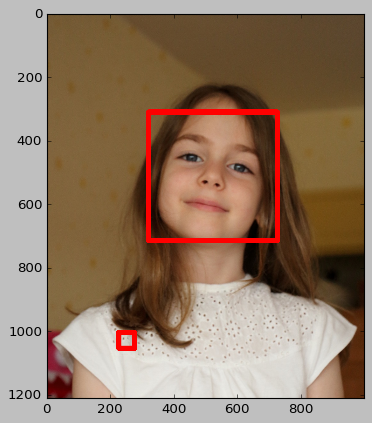

In [ ]:
if len(face_list) ==0:
    print('Fail')
    quit()

for (x, y, w, h) in face_list:
    print('인식좌표:', x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=15)

cv2.imwrite('face_detect_img.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


# 3.openCVEx3 (모자이크)

In [ ]:
def mosaic(img, rect, size):
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    i_small = cv2.resize(i_rect, (size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

In [ ]:
img = cv2.imread('cat.jpg')
mos = mosaic(img, (50, 50, 450, 450), 10)
cv2.imwrite('cat_mosaic.png', mos)

True

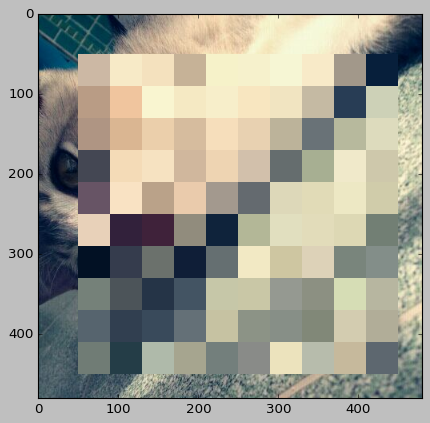

In [ ]:
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))



*   Harr face detection + mosaic 



인식좌표: 290 98 227 227
인식좌표: 579 312 191 191


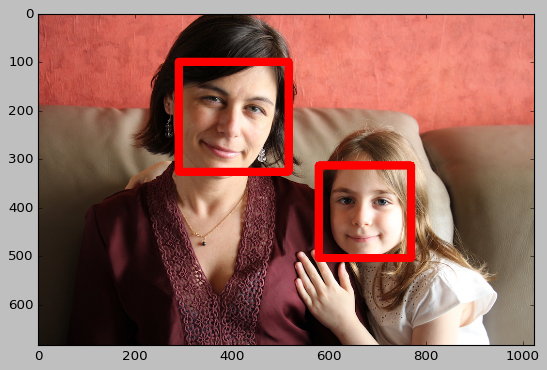

In [ ]:
img = cv2.imread('family.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cascade_file = '/content/openCVModel/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)
face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))


if len(face_list) ==0:
    print('Fail')
    quit()

for (x, y, w, h) in face_list:
    print('인식좌표:', x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=15)

cv2.imwrite('face_detect_img.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

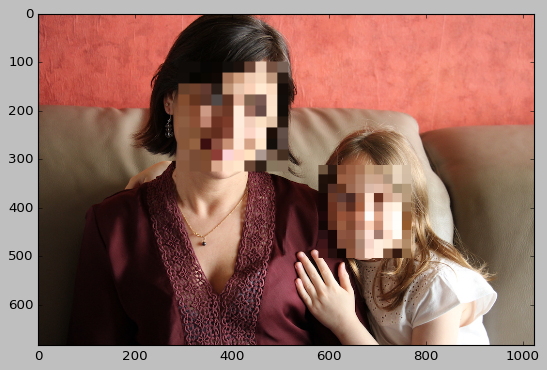

In [ ]:
for (x, y, w, h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)
cv2.imwrite('family_mosaic.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# 4.openCVEx5

In [ ]:
from scipy import ndimage

---0---
얼굴의 좌표 = 319 308 405 405
---10---
얼굴의 좌표 = 394 385 409 409
---20---
얼굴의 좌표 = 451 444 408 408
---30---
얼굴의 좌표 = 494 483 409 409
---40---
---50---
---60---
---70---
---80---


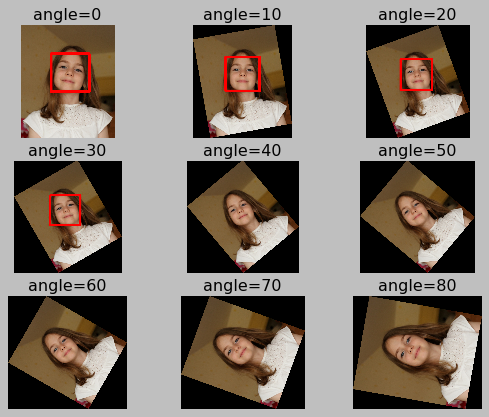

In [ ]:
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)
img = cv2.imread("girl.jpg")

def face_detect(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_list = cascade.detectMultiScale(img_gray, minSize=(300,300))
    for (x,y,w,h) in face_list:
        print("얼굴의 좌표 =", x, y, w, h)
        red = (0, 0, 255)
        cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=30)

for i in range(0, 9):
    ang = i * 10
    print("---" + str(ang) + "---")
    img_r = ndimage.rotate(img, ang)
    face_detect(img_r)
    plt.subplot(3, 3, i + 1)
    plt.axis("off")
    plt.title("angle=" + str(ang))
    plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))
plt.show()

# 5.openCVEx6

In [ ]:
img = cv2.imread('test.png', cv2.IMREAD_GRAYSCALE)

ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) #픽셀 값이 thre 보다 작으면 0 크면 1
ret, th2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV) #픽셀 값이 thre 보다 크면 0 작으면 1
ret, th3 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO) #픽셀 값이 threshold_value보다 작으면 0, 크면 픽셀 값
ret, th4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)  #픽셀 값이 threshold_value보다 작으면 0, 크면 픽셀 값

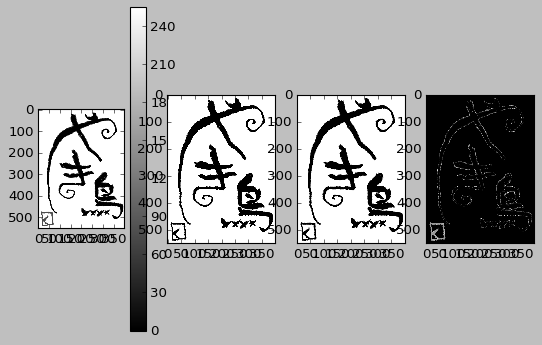

In [ ]:
plt.subplot(141)
plt.imshow(img, 'gray')
plt.colorbar()
plt.subplot(142)
plt.imshow(th1, 'gray')
plt.subplot(143)
plt.imshow(th3, 'gray')
plt.subplot(144)
plt.imshow(th4, 'gray')
plt.show()


# 6.openCVEx7

In [ ]:
import cv2

In [ ]:
img = cv2.imread('flower.jpg')
img = cv2.resize(img, (300, 170))

gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gimg = cv2.GaussianBlur(gimg, (7,7), 0)
im2 = cv2.threshold(gimg, 140, 240, cv2.THRESH_BINARY_INV)[1]

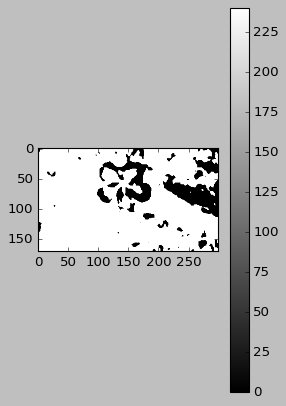

In [ ]:
plt.subplot(121)
plt.imshow(im2, cmap='gray')
plt.colorbar()



mode:
cv2.RETR_LIST : 단순 윤곽 검출
cv2.EXTERNAL: 가장 외곽에 있는 윤곽만 검출
cv2. RETR_TREE: 모든 윤곽 검출하고 계층 구조로 저장
method: 
cv2.CHAIN_APPROX_NONE: 모든 윤곽에 있는 점을 반환
cv2.CHAIN_APPROX_SIMPLE: 의미없는 정보를 제거하고 점을 반환
cv2.CHAIN_APPROX_TC89_L1: Ten_chin 연결 근사 알고리즘을 적용하여 컨투어 포인트를 줄임


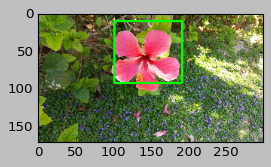

In [ ]:

cnts, hirachy = cv2.findContours(im2.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

for pt in cnts:
    x, y, w, h = cv2.boundingRect(pt)
    if w < 30 or w > 200: continue
    cv2.rectangle(img, (x,y),(x+w, y+h), (0,255,0), 2)
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig('find_contuous.png', dpi=200)
plt.show()

(1124, 2)


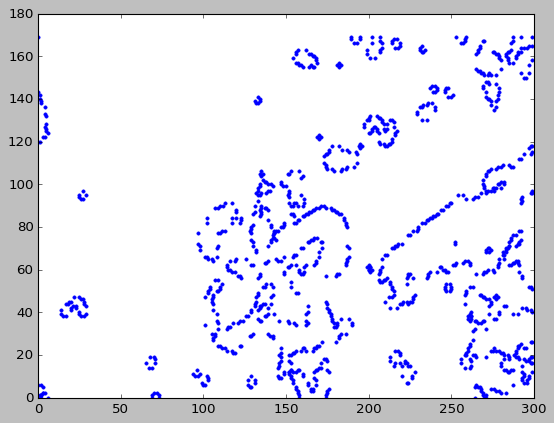

In [ ]:
a = np.vstack(np.array(cnts)).reshape(-1,2)
print(a.shape)
plt.plot(a[:,0], a[:,1],'.')
plt.show()

# 7.openCVEx8

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
def detect_zipno(fname):
    img = cv2.imread(fname)
    h, w = img.shape[:2]
    img = img[0:h//2, w//3:]
    gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gimg = cv2.GaussianBlur(gimg, (3,3), 0)
    im2 = cv2.threshold(gimg, 140, 255, cv2.THRESH_BINARY_INV)[1]
    cnts, hierachy = cv2.findContours(im2.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    result = []
    for pt in cnts:
        x,y,w,h = cv2.boundingRect(pt)
        if not(50 < w < 70) : continue
        result.append([x,y,w,h])
    result = sorted(result, key=lambda x:x[0])
    result2 = []
    lastx = -100
    for x, y, w, h in result:
        if(x-lastx) < 10: continue
        result2.append([x,y,w,h])
    for x,y,w,h in result2:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)
    return result2, img

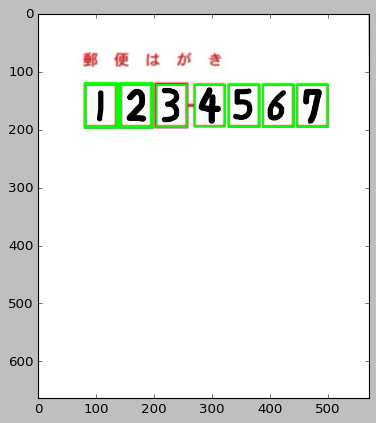

In [ ]:
cnts, img = detect_zipno('hagaki1.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig('contuous_zip.png', dpi=200)
plt.show()

# 8.openCVEX9 

H (색상), S(채도), ㅍ(명도)

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)
# while True:
#     _ret, frame = cap.read()
#     frame = cv2.resize(frame, (500,400))
#     cv2.imshow('opencv camera', frame)
#     k = cv2.waitKey(1) #1msec 대기
#     if k==27 or k==13 : break

# while True:
#     _ret, frame = cap.read()
#     frame = cv2.resize(frame, (500,400))
#     frame[:,:,0] = 0
#     frame[:,:,1] = 0
#     cv2.imshow('opencv camera', frame)
#     k = cv2.waitKey(1) #1msec 대기
#     if k==27 or k==13 : break

# while True:
#     _ret, frame = cap.read()
#     frame = cv2.resize(frame, (500,400))
#     hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
#     h = hsv[:, :, 0] #hue
#     s = hsv[:, :, 1] #saturation
#     v = hsv[:, :, 2] # value brighthness
#     img = np.zeros(h.shape, dtype=np.uint8)
#     img[((h < 50) | (h > 200)) & (s > 100)] = 255
#     cv2.imshow('opencv camera', img)
#     k = cv2.waitKey(1) #1msec 대기
#     if k==27 or k==13 : break
# cap.release()
# cv2.destroyAllWindows()

cap = cv2.VideoCapture(0)
img_last = None
green = (0,255,0)
while True:
    _ret, frame = cap.read()
    frame = cv2.resize(frame, (500,400))
    gimg = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gimg = cv2.GaussianBlur(gimg, (9,9), 0)
    img_b = cv2.threshold(gimg, 100, 255, cv2.THRESH_BINARY_INV)[1]
    if img_last is None:
        img_last = img_b
        continue
    frame_diff = cv2.absdiff(img_last, img_b)
    cnts, hierachy = cv2.findContours(frame_diff.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    for pt in cnts:
        x,y,w,h = cv2.boundingRect(pt)
        if 30 < w : continue
        cv2.rectangle(frame, (x, y), (x+w, y+h), green, 2)
    img_last = img_b
    cv2.imshow('diff camera', frame)
    cv2.imshow('diff data', frame_diff)
    k = cv2.waitKey(1) #1msec 대기
    if k==27 or k==13 : break

    
cap.release()
cv2.destroyAllWindows()


# 9.AEEx1

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1,28*28)/255.0
x_test = x_test.reshape(-1,28*28)/255.0

In [ ]:
model = Sequential()
model.add(Dense(784, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, x_train, epochs=20, batch_size=200)

Epoch 1/20
240/240 [==============================] - 1s 4ms/step - loss: 0.0509 - accuracy: 0.0127 - val_loss: 0.0242 - val_accuracy: 0.0107
Epoch 2/20
240/240 [==============================] - 1s 3ms/step - loss: 0.0178 - accuracy: 0.0122 - val_loss: 0.0138 - val_accuracy: 0.0102
Epoch 3/20
240/240 [==============================] - 1s 3ms/step - loss: 0.0120 - accuracy: 0.0116 - val_loss: 0.0109 - val_accuracy: 0.0113
Epoch 4/20
240/240 [==============================] - 1s 3ms/step - loss: 0.0099 - accuracy: 0.0119 - val_loss: 0.0093 - val_accuracy: 0.0126
Epoch 5/20
240/240 [==============================] - 1s 3ms/step - loss: 0.0087 - accuracy: 0.0126 - val_loss: 0.0084 - val_accuracy: 0.0111
Epoch 6/20
240/240 [==============================] - 1s 3ms/step - loss: 0.0079 - accuracy: 0.0127 - val_loss: 0.0077 - val_accuracy: 0.0121
Epoch 7/20
240/240 [==============================] - 1s 3ms/step - loss: 0.0073 - accuracy: 0.0124 - val_loss: 0.0073 - val_accuracy: 0.0120
Epoch 

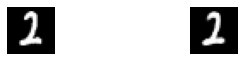

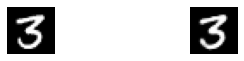

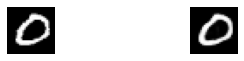

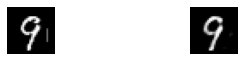

In [ ]:
plt.figure()
for i in range(4):
    plt.subplot(4, 2, (i*2+1))
    rand_index = random.randint(0, x_test.shape[0])
    plt.imshow(x_test[rand_index].reshape(28,28), cmap='gray')
    plt.axis('off')

    plt.subplot(4,2,(i * 2 + 2))
    img = model.predict(np.expand_dims(x_test[rand_index], axis=0))
    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.show()

# 10.AEEx2(CAE)

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Conv2DTranspose, Reshape
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1,28, 28,1)/255.0
x_test = x_test.reshape(-1,28, 28,1)/255.0

In [ ]:
model = Sequential([
                    Conv2D(32, kernel_size=2, strides=(2,2), activation=tf.keras.activations.swish, input_shape=(28,28,1)),
                    Conv2D(64, kernel_size=2, strides=(2,2), activation='swish'),
                    Flatten(),
                    Dense(64, activation='swish'), 
                    Dense(7*7*64), 
                    Reshape(target_shape=(7, 7, 64)),
                    Conv2DTranspose(32, kernel_size=2, strides=(2,2), padding='same', activation='swish'),
                    Conv2DTranspose(1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid')
])
model.summary()

model.compile(optimizer='adam', loss='mse', metrics='accuracy')

model.fit(x_train, x_train, batch_size=200, epochs=20)

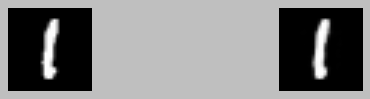

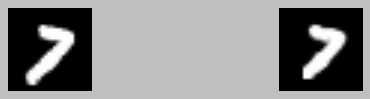

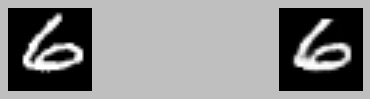

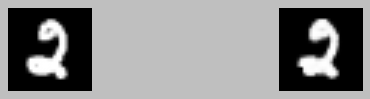

In [ ]:
plt.figure()
for i in range(4):
    plt.subplot(4, 2, (i*2+1))
    rand_index = random.randint(0, x_test.shape[0])
    plt.imshow(x_test[rand_index].reshape(28,28), cmap='gray')
    plt.axis('off')

    plt.subplot(4,2,(i * 2 + 2))
    img = model.predict(np.expand_dims(x_test[rand_index], axis=0))
    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.show()

# 11.AEEx3 (잡음제거)

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, UpSampling2D
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img
import random

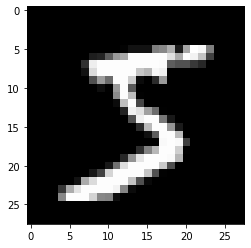

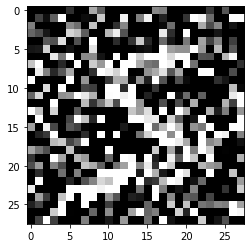

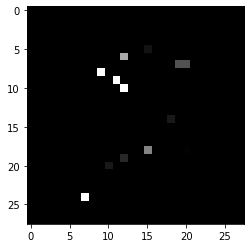

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28 , 28, 1) / 255.
x_test = x_test.reshape(-1, 28 , 28, 1) / 255.

def make_making_noise_data(data_x, percent= 0.1):
    size = data_x.shape
    making = np.random.binomial(n=1, p=percent, size=size)
    return data_x * making
x_train_maked = make_making_noise_data(x_train)
x_test_maked = make_making_noise_data(x_test)

def make_gaussian_noise_data(data_x, scale=0.8):
    gaussian_data_x = data_x + np.random.normal(loc=0, scale=scale, size=data_x.shape)
    gaussian_data_x = np.clip(gaussian_data_x, 0, 1)
    return gaussian_data_x

x_train_gauss = make_gaussian_noise_data(x_train)
x_test_gauss = make_gaussian_noise_data(x_test)

plt.imshow(array_to_img(x_train[0]), 'gray')
plt.figure()
plt.imshow(array_to_img(x_train_gauss[0]),'gray')
plt.figure()
plt.imshow(array_to_img(x_train_maked[0]),'gray')
plt.show()

In [ ]:
autoencoder = Sequential()
#encoder
autoencoder.add(Conv2D(16, (3,3), 1, activation='elu', padding='same', input_shape=(28, 28, 1)))
autoencoder.add(MaxPooling2D((2,2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='elu', padding='same'))
autoencoder.add(MaxPooling2D((2,2),padding='same'))

#decoder
autoencoder.add(Conv2D(8, (3,3), 1, activation='elu', padding='same'))
autoencoder.add(UpSampling2D((2,2)))
autoencoder.add(Conv2D(16, (3,3), 1, activation='elu', padding='same'))
autoencoder.add(UpSampling2D((2,2)))
autoencoder.add(Conv2D(1, (3,3), 1, activation='sigmoid', padding='same'))
autoencoder.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

autoencoder.summary()

autoencoder.fit(x_train_gauss, x_train, batch_size=200, epochs=20, shuffle=True)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_8 (UpSampling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 16)      

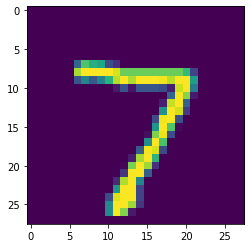

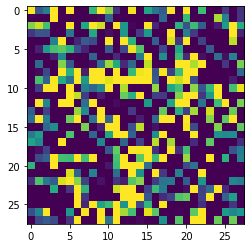

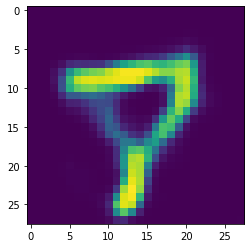

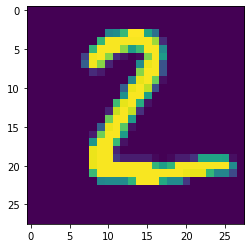

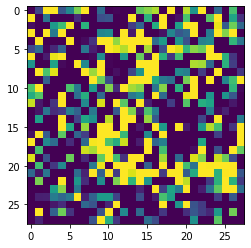

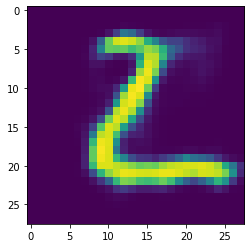

In [ ]:
gauss_preds = autoencoder.predict(x_test_gauss[:2])

for i in range(2):
    plt.imshow(array_to_img(x_test[i]))
    plt.figure()
    plt.imshow(array_to_img(x_test_gauss[i]))
    plt.figure()
    plt.imshow(array_to_img(gauss_preds[i]))
    plt.show()

# HW day4 

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Sequential, Model
import matplotlib.pyplot as plt
import numpy as np
import random

Model: "ae_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_192 (Dense)            (None, 784)               615440    
_________________________________________________________________
dense_193 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_194 (Dense)            (None, 784)               50960     
Total params: 716,640
Trainable params: 716,640
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0437 - accuracy: 0.0114
Epoch 2/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0141 - accuracy: 0.0109
Epoch 3/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0103 - accuracy: 0.0113
Epoch 4/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0086 - acc

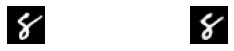

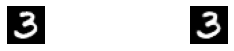

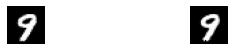

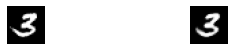

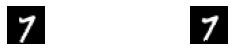

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1,28*28)/255.0
x_test = x_test.reshape(-1,28*28)/255.0


# encoder = Sequential()
# encoder.add(Dense(784, activation='relu', input_shape=(784,)))
# encoder.add(Dense(64, activation='relu'))

# decoder = Sequential()
# decoder.add(Dense(784, activation='sigmoid', input_shape=(64,)))
# encoder.add(decoder)
# encoder.summary()

# encoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# encoder.fit(x_train, x_train, batch_size=200, epochs=20)

class AE(Sequential):
    def __init__(self, size):
        super().__init__()
        self.size = size

    def enc_model(self, enc_n, lat_n):
        self.add(Dense(enc_n, activation='relu', input_shape=(self.size,)))
        self.add(Dense(lat_n, activation='relu'))


    def dec_model(self, dec_n):
        self.add(Dense(dec_n, activation='sigmoid'))
    
    def show_ae(self, test_img, num):
        plt.figure()
        for i in range(num):
            plt.subplot(num, 2, (i*2+1))
            rand_index = random.randint(0, test_img.shape[0])
            plt.imshow(test_img[rand_index].reshape(28,28), cmap='gray')
            plt.axis('off')

            plt.subplot(num, 2, (i * 2 + 2))
            img = self.predict(np.expand_dims(test_img[rand_index], axis=0))
            plt.imshow(img.reshape(28,28), cmap='gray')
            plt.axis('off')
            plt.show()
        
ae_model = AE(784)
ae_model.enc_model(784, 64)
ae_model.dec_model(784)
ae_model.summary()

ae_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
ae_model.fit(x_train, x_train, batch_size=200, epochs=20)

ae_model.show_ae(x_test, 5)

In [ ]:
import tensorflow as tf

In [ ]:
tf.keras.layers.Convolution2DTranspose(3, (3,3), 2, )(tf.ones(shape=(1,10,10,5))).shape

TensorShape([1, 21, 21, 3])